In [1]:
import os
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from questrade import QuestradeBot

# Personal Inputs

In [2]:
ACCOUNT_NUM = 51802566
QUESTRADE_TOKEN = 'e4ZzFC5dD_HwPZMzAQJaKgmbYWAQ3CML0'

# Instance Initialization

In [3]:
qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

PLEASE CHECK THE ACCOUNT NUMBER


# Account Balance

In [4]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.00,0.00
USD,21725.1815,10803.76,32528.9415,66.79,33.21


# Portfolio Holdings

In [5]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,583.17,-1.26,5.40
O,REALTY INCOME CORP,USD,75,5422.50,18.14,50.19
JPM,JPMORGAN CHASE & CO.,USD,6,956.94,3.93,8.86
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,702.87,19.73,6.51
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,763.14,19.36,7.06
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1197.42,-1.86,11.08
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,592.72,-2.30,5.49
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,585.00,-1.38,5.41


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

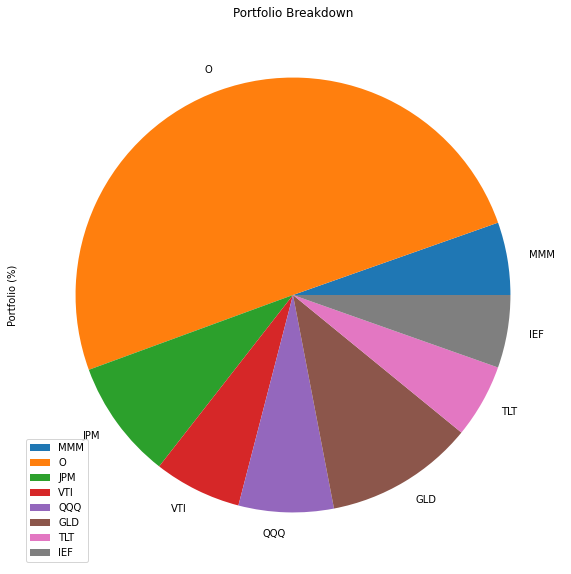

In [6]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

# Monthly Dividend Income

In [7]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

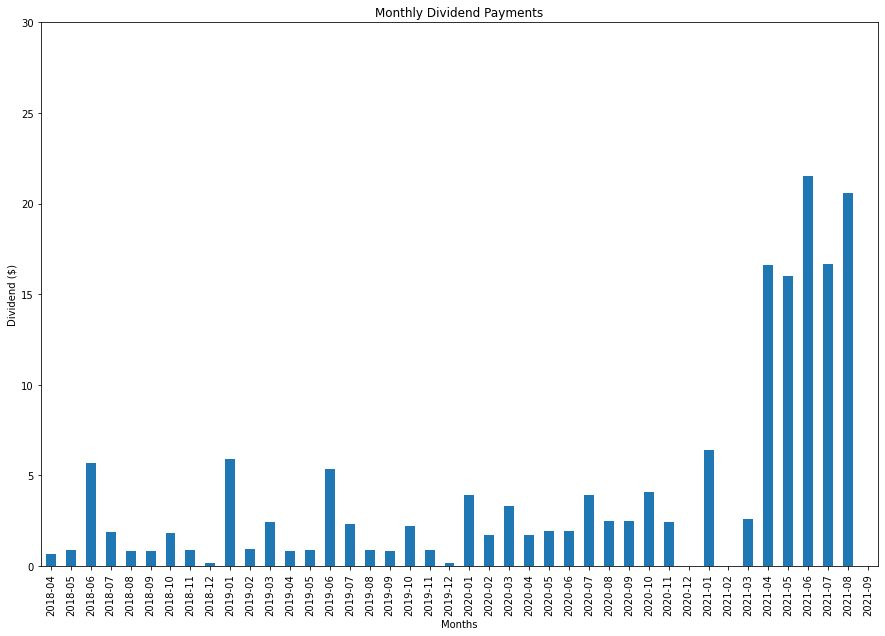

In [8]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

# Performance Against Benchmark